# CAPSTONE PROJECT CREDIT CARD APPROVAL

Q1 :**Why is your proposal important in today’s world?How predict a good client worthy for bank ?**

Ans :
1. Risk Management : By accurately predicting the creditworthiness of potential clients, banks can better manage their risk exposure and minimize the likelihood of default

2. Client Satisfaction :By leveraging data analysis and machine learning techniques, banks can streamline the approval process and provide a better experience for clients


 Q2. **How is it going to impact banking sector ?**

 Ans :
 1. Automated credit card approval processes can streamline operations and reduce the time and resources required to assess applications manually.

2. By leveraging data analytics and machine learning, banks can expand access to credit to a wider range of clients, including those with limited credit history or from underserved communities.



# Get To Know About Data

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# sns.get_dataset_names()
credit_card_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Credit_card.csv")
credit_card_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [53]:
credit_card_label=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Credit_card_label.csv")
credit_card_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
# Merge the dataframes on the common column 'Ind_ID'
merged_data = pd.merge(credit_card_data, credit_card_label, on='Ind_ID')

# Store the merged data into another CSV file
merged_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Final_Credit_Card_Approval.csv", index=False)

# Display the first few rows of the merged data
print(merged_data.head())

    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0        

### **Section 2: Initial Hypothesis (or hypotheses)**

Q1. **Here you have to make some assumptions based on the questions you want to address based on the DA track or ML track**

Ans : Hypothesis 1 : Person with higher annual income  have chance to get credit card approval.


Hypothesis 2 : Gradient Boosting Algorithm based ML predict accurate value.

## **Section 3: Data analysis approach**

In [54]:
cc_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final_Credit_Card_Approval.csv")
cc_data.head(20)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2,1
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1


In [55]:
#Get to know about columns   present in dataset :
print(list(cc_data.columns))

['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members', 'label']


In [56]:
#Get know about data type of each colmn and total number non-null values of each column
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [57]:
#Get know about missing values in each column
cc_data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [58]:
#Give Description of dataset including the column which have datatype object
cc_data.describe(include='object')

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
count,1541,1548,1548,1548,1548,1548,1548,1060
unique,2,2,2,4,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,973,924,1010,798,1031,1049,1380,268


In [59]:
#To check about the number of duplicated columns.
cc_data.duplicated().sum()

0

In [60]:
print(cc_data["GENDER"].value_counts())
print("---------------------------------------------")
print(cc_data["Car_Owner"].value_counts())
print("---------------------------------------------")
print(cc_data["Propert_Owner"].value_counts())
print("---------------------------------------------")
print(cc_data["CHILDREN"].value_counts())
print("---------------------------------------------")
print(cc_data["Mobile_phone"].value_counts())
print("---------------------------------------------")
print(cc_data["Work_Phone"].value_counts())
print("---------------------------------------------")
print(cc_data["Marital_status"].value_counts())
print("---------------------------------------------")
print(cc_data["Type_Occupation"].value_counts())
print("---------------------------------------------")
print(cc_data["Family_Members"].value_counts())
print("---------------------------------------------")
print(cc_data["Housing_type"].value_counts())
print("---------------------------------------------")
print(cc_data["EDUCATION"].value_counts())
# print("---------------------------------------------")

print(cc_data["Type_Income"].value_counts())

F    973
M    568
Name: GENDER, dtype: int64
---------------------------------------------
N    924
Y    624
Name: Car_Owner, dtype: int64
---------------------------------------------
Y    1010
N     538
Name: Propert_Owner, dtype: int64
---------------------------------------------
0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64
---------------------------------------------
1    1548
Name: Mobile_phone, dtype: int64
---------------------------------------------
0    1226
1     322
Name: Work_Phone, dtype: int64
---------------------------------------------
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64
---------------------------------------------
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech s

From Above Observation , we come to conclude that most of the columns are categorical columns , only 3-4 columns are numerical column.
Column like **Birthday_count** ,  **Employed_days** seems to irrelevant , instead of this we can make new columns like age , work_experience.

In [61]:
# Calculate age from Birthday_count (assuming Birthday_count is in days)
cc_data['Age'] = round(-cc_data['Birthday_count'] / 365)
cc_data['EDUCATION'] = cc_data['EDUCATION'].replace(['Secondary / secondary special'], 'Secondary')

# Calculate work experience from Employee_days (assuming Employee_days is in days)
# credit_card_data['Work_Experience'] =round(-credit_card_data['Employed_days'] / 365, 1)

In [63]:
cc_data['Age'].head(100)

0     51.0
1     37.0
2      NaN
3     37.0
4     37.0
      ... 
95    42.0
96    29.0
97    29.0
98    47.0
99    61.0
Name: Age, Length: 100, dtype: float64

In [64]:
cc_data['Work_Experience'] = cc_data['Employed_days']
cc_data['Work_Experience'] = cc_data['Work_Experience'].apply(lambda x: 0 if x > 0 else x)
cc_data['Work_Experience'] =round(-cc_data['Work_Experience'] / 365, 1)
cc_data['Work_Experience'].head(100)

0     0.0
1     1.6
2     1.6
3     1.6
4     1.6
     ... 
95    2.4
96    0.6
97    0.6
98    1.5
99    0.0
Name: Work_Experience, Length: 100, dtype: float64

<ipython-input-65-c9bff57cc694>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cc_data["Type_Occupation"], palette='Blues')
<ipython-input-65-c9bff57cc694>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cc_data['Marital_status'],  palette='Greens')


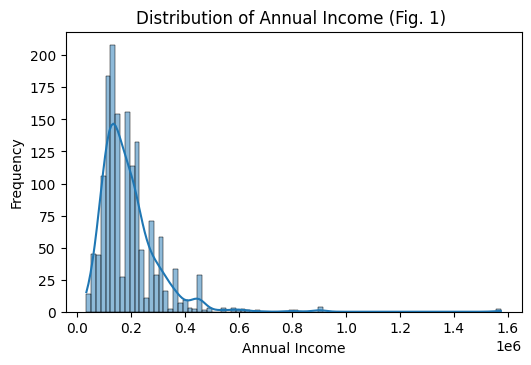

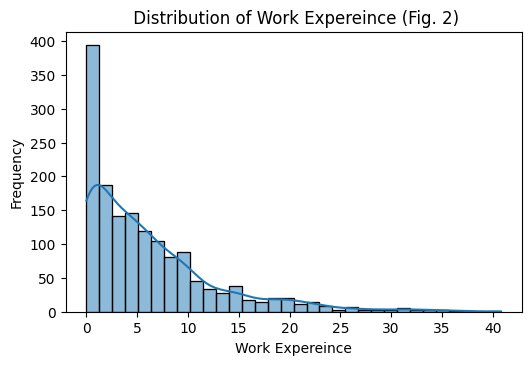

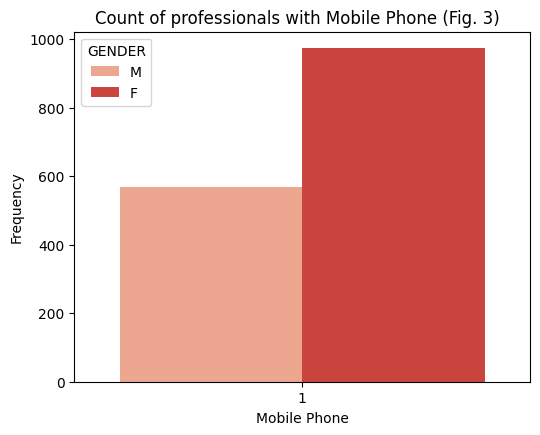

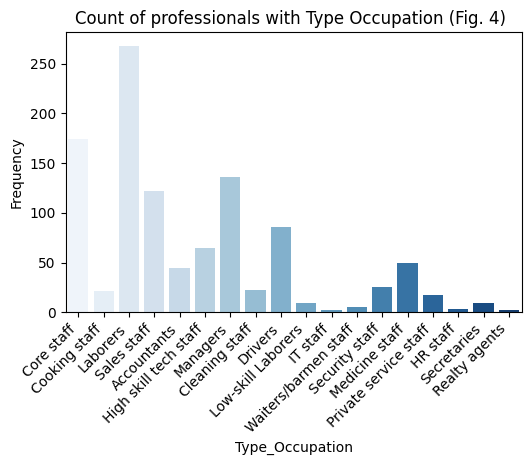

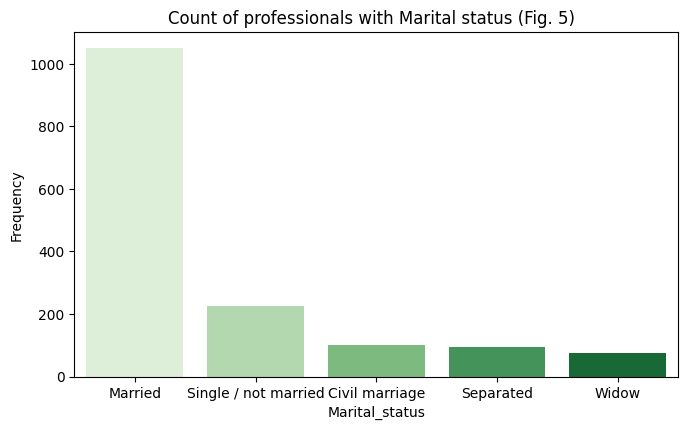

In [65]:
plt.figure(figsize=(20, 8))  # Adjust the figure size
plt.subplot(2, 3, 1)
sns.histplot(cc_data['Annual_income'], kde=True)
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income (Fig. 1) ")

plt.figure(figsize=(20, 8))  # Adjust the figure size
plt.subplot(2, 3, 2)
sns.histplot(cc_data['Work_Experience'], kde=True)
plt.xlabel("Work Expereince")
plt.ylabel("Frequency")
plt.title(" Distribution of Work Expereince (Fig. 2)")

plt.figure(figsize=(20, 10))  # Adjust the figure size
plt.subplot(2, 3, 3)
sns.countplot(x=cc_data['Mobile_phone'],hue=cc_data["GENDER"] ,palette='Reds')
plt.xlabel("Mobile Phone")
plt.ylabel("Frequency")
plt.title("Count of professionals with Mobile Phone (Fig. 3)  ")


plt.figure(figsize=(20, 8))  # Adjust the figure size
plt.subplot(2, 3, 4)
# Work_Phone_palette = sns.color_palette("Set1", len(cc_data['Work_Phone'].unique()))
sns.countplot(x=cc_data["Type_Occupation"], palette='Blues')
plt.xlabel("Type_Occupation")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.title("Count of professionals with Type Occupation (Fig. 4) ")

plt.figure(figsize=(20, 8))  # Adjust the figure size
plt.subplot(2, 3, 5)
# email_id_palette = sns.color_palette("Set2", len(cc_data['EMAIL_ID'].unique()))
sns.countplot(x=cc_data['Marital_status'],  palette='Greens')
plt.xlabel("Marital_status")
plt.ylabel("Frequency")
plt.title("Count of professionals with Marital status (Fig. 5)  ")


plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()




* From Fig. 1 , It shows that distribution of annual income seems like normally distributed  and positive skewness means mean value of annual income would be greater than median value.

* From Fig. 2, It shows that distribution of work expereince is positively skewed.

* From Fig.3 Maximnum number of females carries phone , male does not carry phone.

* From Fig.4 , maximum persons are labourers ,then cooking staff , very less number of professionals work in HR, IT field.

* From Fig.5 , maximum number of professionals are married.

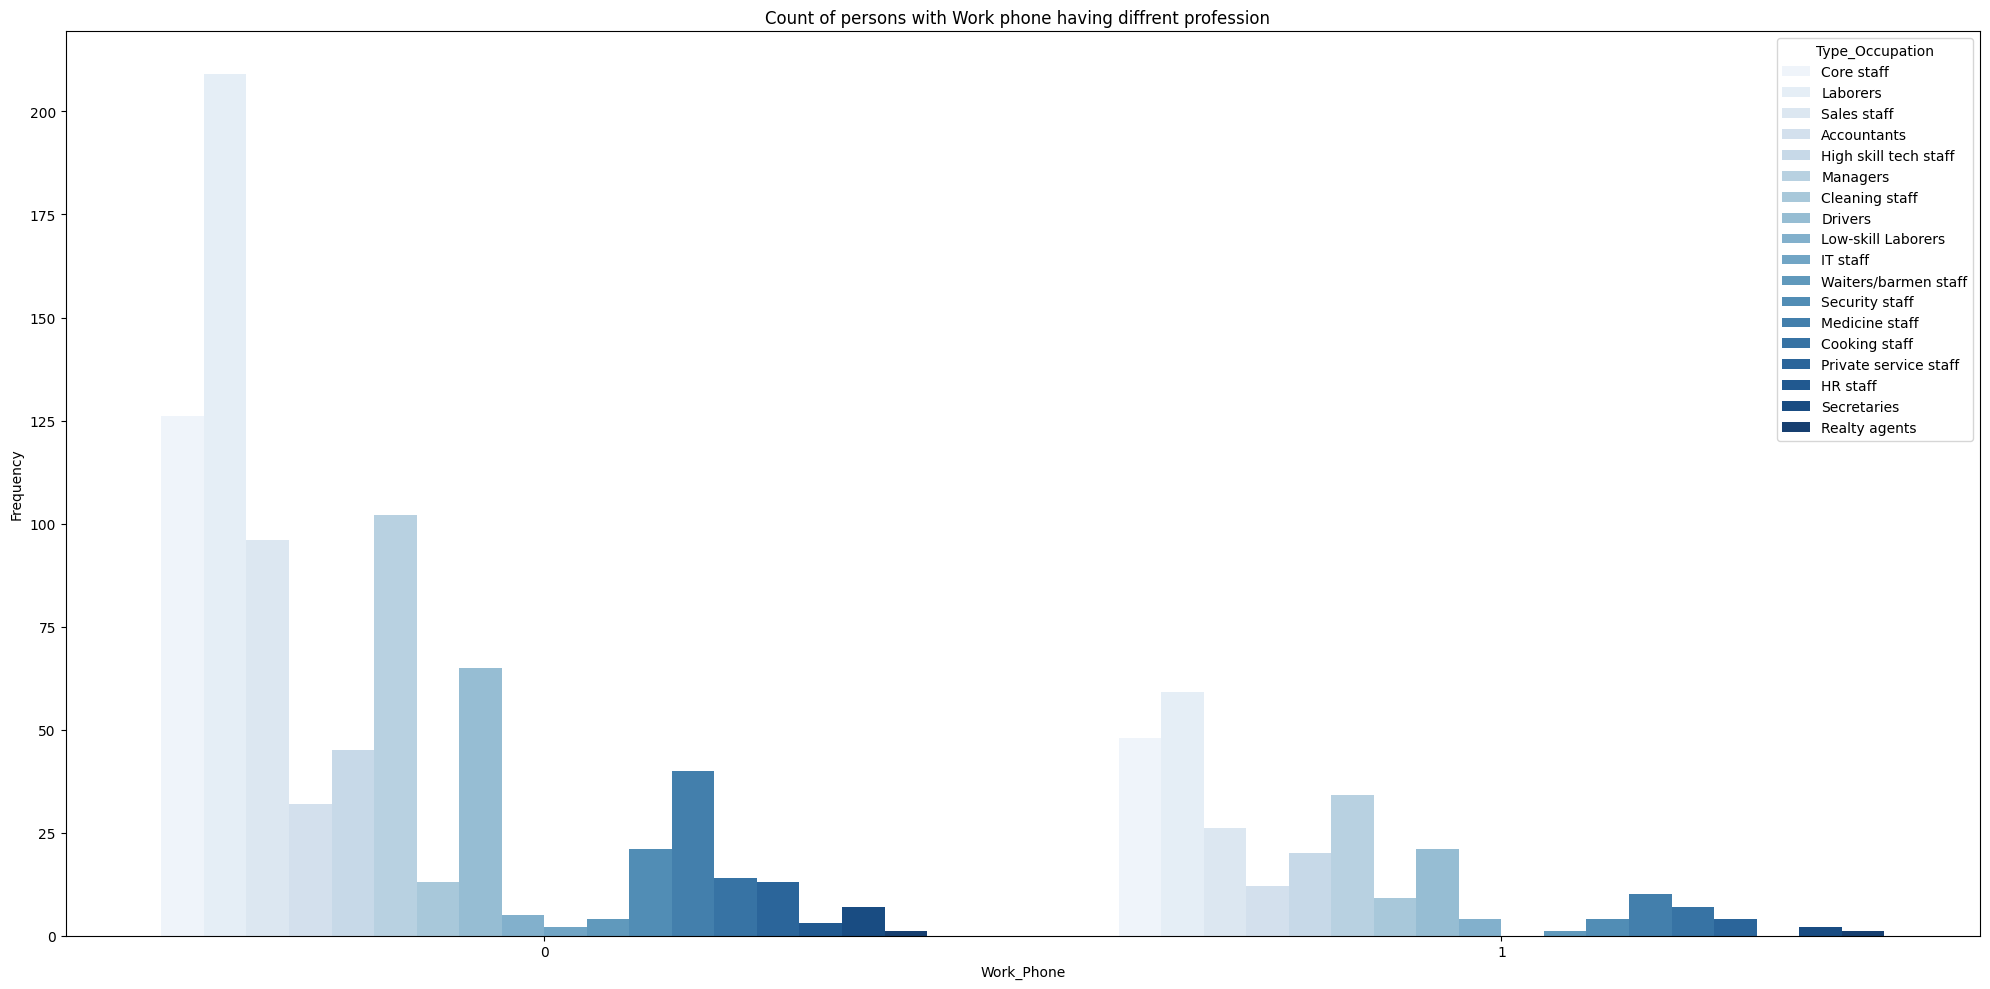

In [66]:
plt.figure(figsize=(20, 10))  # Adjust the figure size
# Work_Phone_palette = sns.color_palette("Set1", len(cc_data['Work_Phone'].unique()))
# Work_Phone_palette = sns.color_palette("Set1", len(cc_data['Work_Phone'].unique()))
sns.countplot(x=cc_data['Work_Phone'], hue=cc_data["Type_Occupation"] ,palette='Blues')
plt.xlabel("Work_Phone")
plt.ylabel("Frequency")
plt.title("Count of persons with Work phone having diffrent profession  ")
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()




Form Above figure, it can be observed that the most of labourers  dont have work phone  for work purpose, they have mobile phone only, may be they use same phone as work phone and there is no private service staff which  have work phone and same goes for low skill labourers which dont have work phone.
They all have mobile phone and may be they use it as work phone.



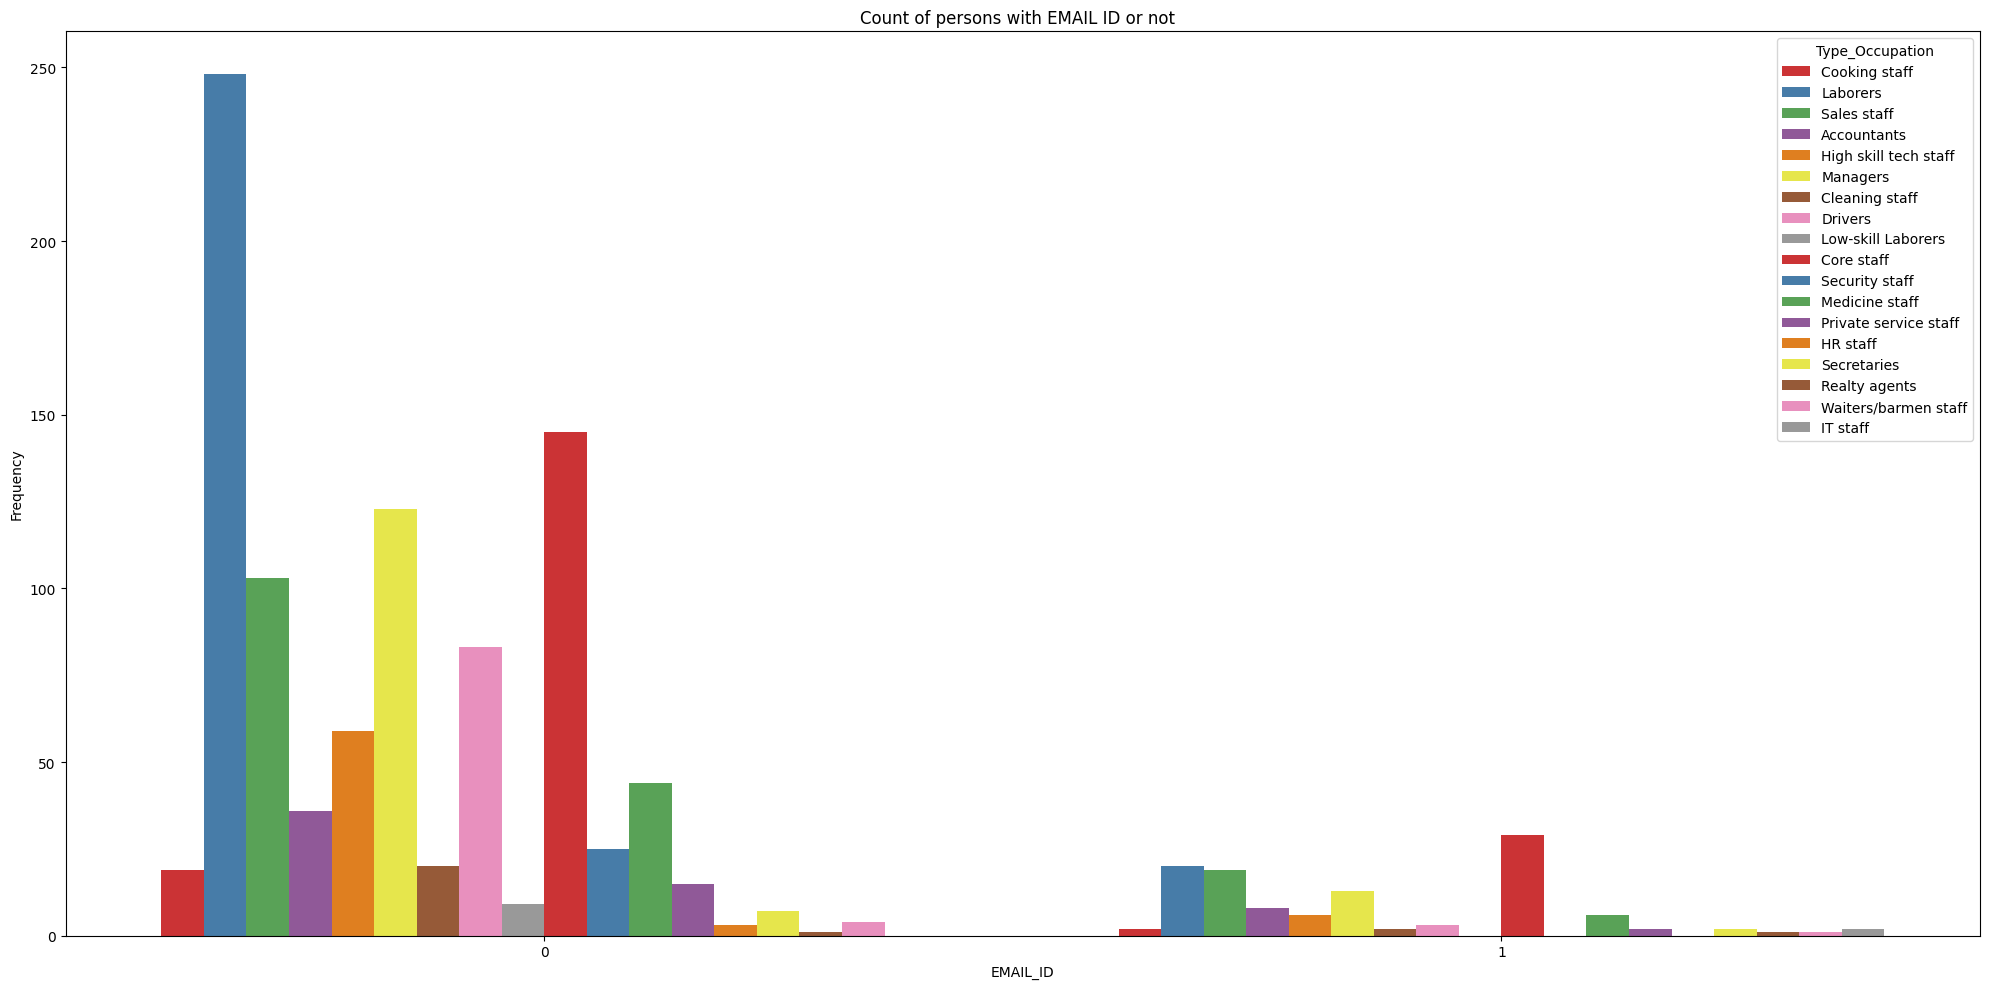

In [67]:
plt.figure(figsize=(20, 10))  # Adjust the figure size
# email_id_palette = sns.color_palette("Set2", len(cc_data['EMAIL_ID'].unique()))
# email_id_palette = sns.color_palette("Set2", len(cc_data['EMAIL_ID'].unique()))
sns.countplot(x=cc_data['EMAIL_ID'], hue=cc_data["Type_Occupation"], palette='Set1')
plt.xlabel("EMAIL_ID")
plt.ylabel("Frequency")
plt.title("Count of persons with EMAIL ID or not  ")
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

Form above bar plot , It is observed that labourer ,sales staff, core staff and ither occupations don't have email id. very few number people may be less than 25 in each occupation have mobile phone.

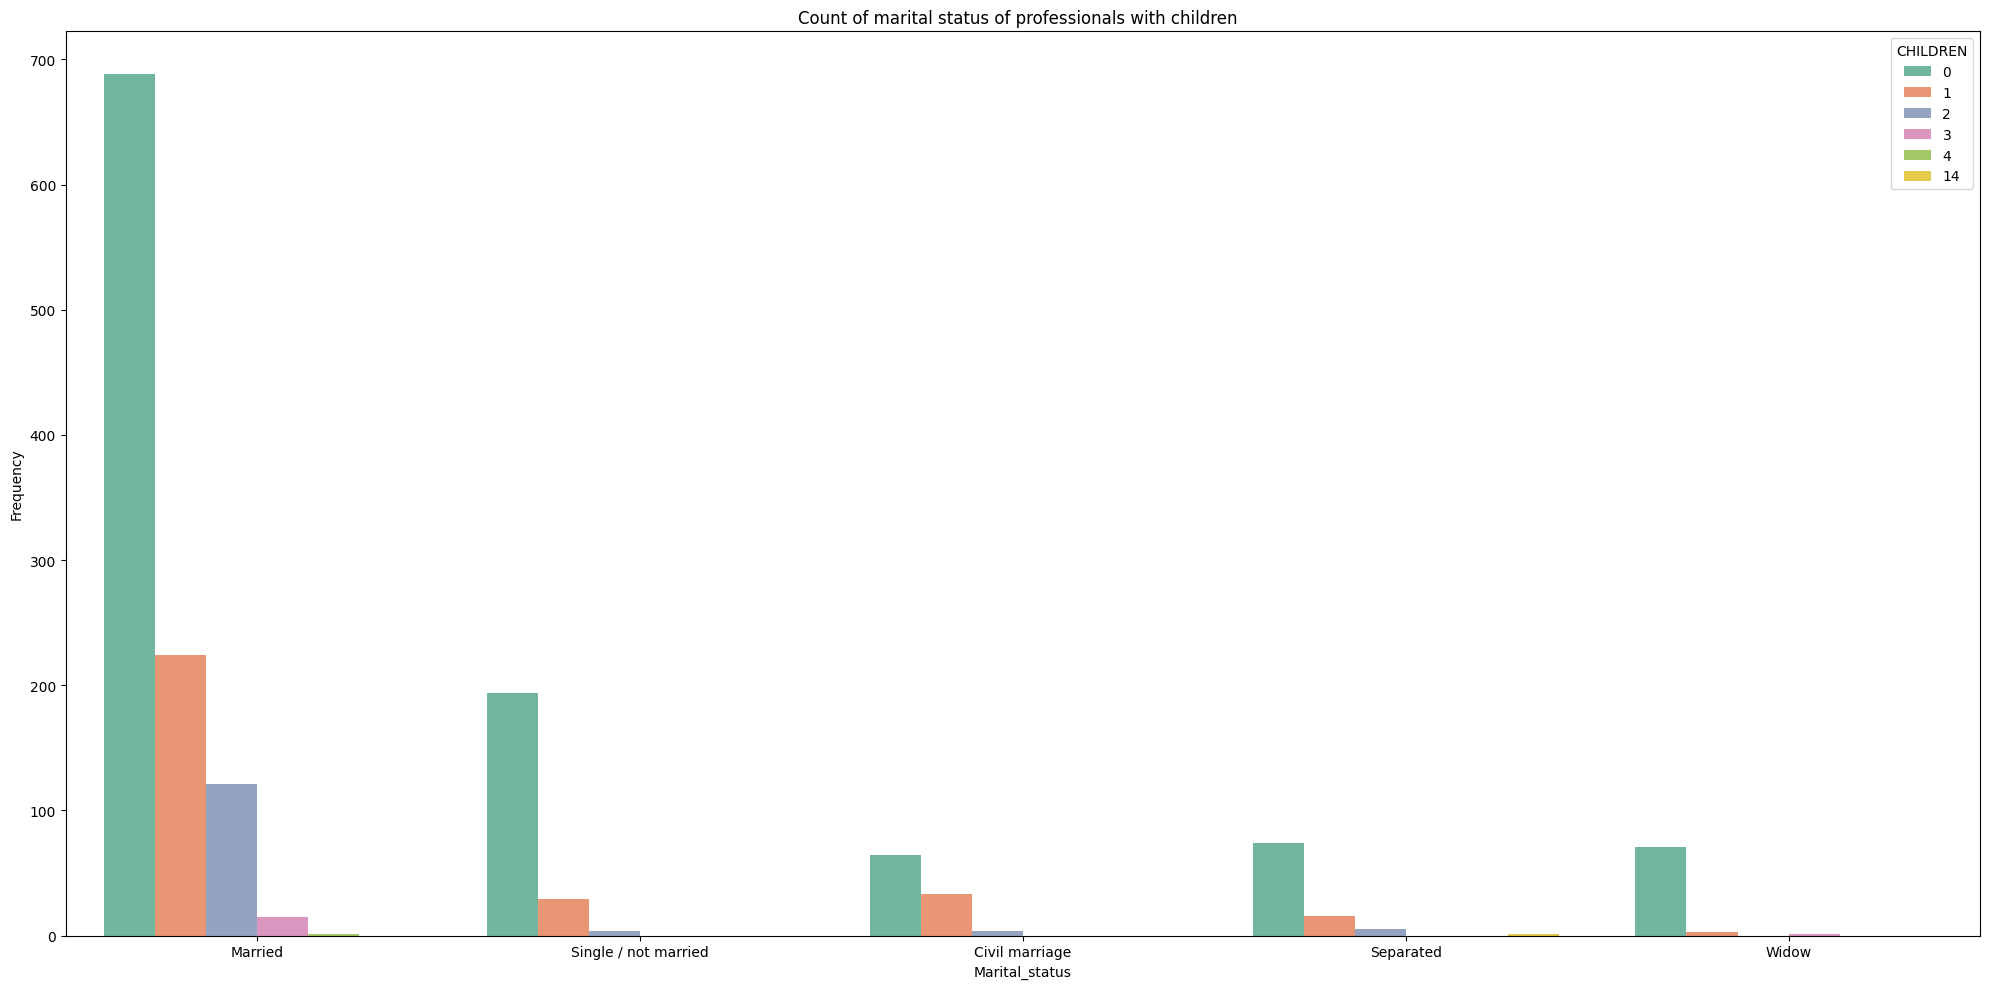

In [68]:
plt.figure(figsize=(20, 10))  # Adjust the figure size
# email_id_palette = sns.color_palette("Set2", len(cc_data['EMAIL_ID'].unique()))
# email_id_palette = sns.color_palette("Set2", len(cc_data['EMAIL_ID'].unique()))
sns.countplot(x=cc_data['Marital_status'], hue=cc_data["CHILDREN"],  palette='Set2')
plt.xlabel("Marital_status")
plt.ylabel("Frequency")
plt.title("Count of marital status of professionals with children  ")
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

From above graph , we can observe thatmost of  married professionals does not have a child, near about 220 pmarried professionals have single child.Strangely single/not married professionals have also single child.

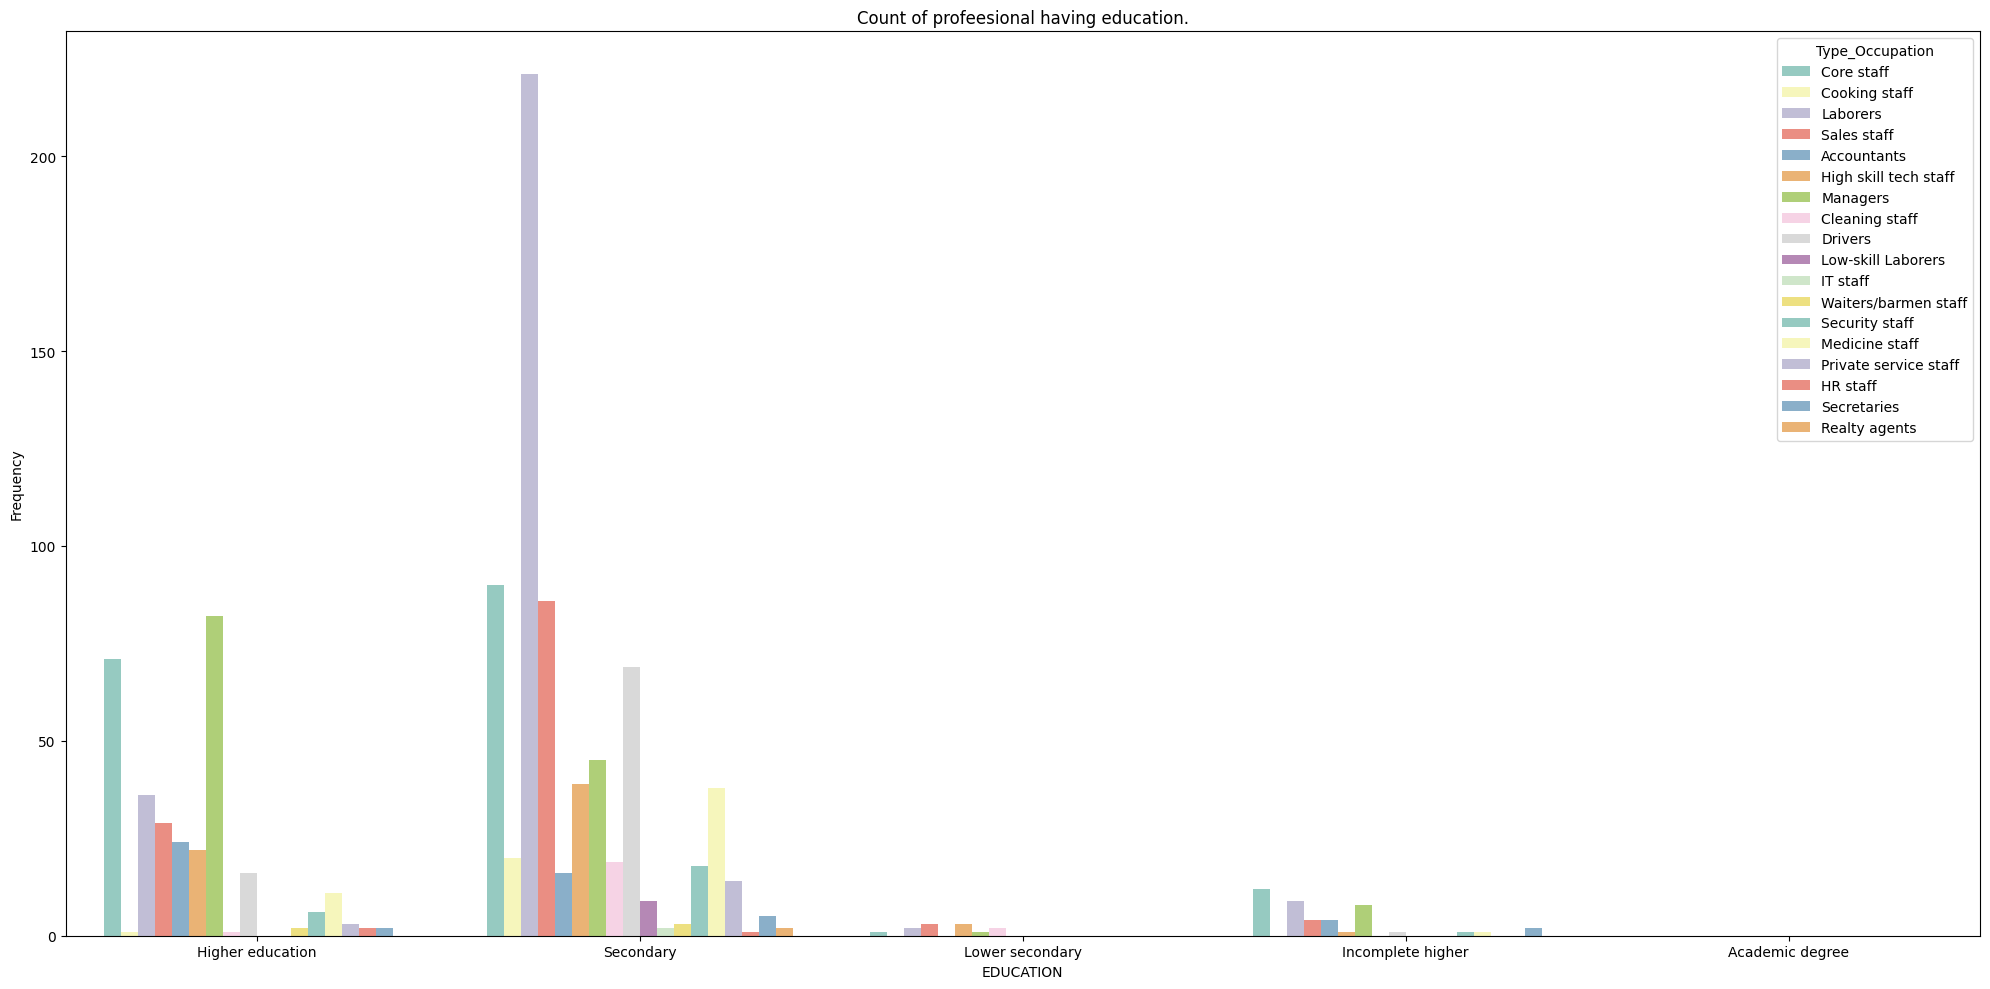

In [69]:
plt.figure(figsize=(20, 10))  # Adjust the figure size
# email_id_palette = sns.color_palette("Set2", len(cc_data['EMAIL_ID'].unique()))
# email_id_palette = sns.color_palette("Set2", len(cc_data['EMAIL_ID'].unique()))
sns.countplot(x=cc_data['EDUCATION'], hue=cc_data["Type_Occupation"],  palette='Set3')
plt.xlabel("EDUCATION")
plt.ylabel("Frequency")
plt.title("Count of profeesional having education.")
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

Persons with  profession of labourers are educated upto secondary level.
Persons with profession of manager have higher education. No person have acedmic degree.Most of the person having profession in cleaning staff, low skill labourer, hr staff  have incomplete higher.

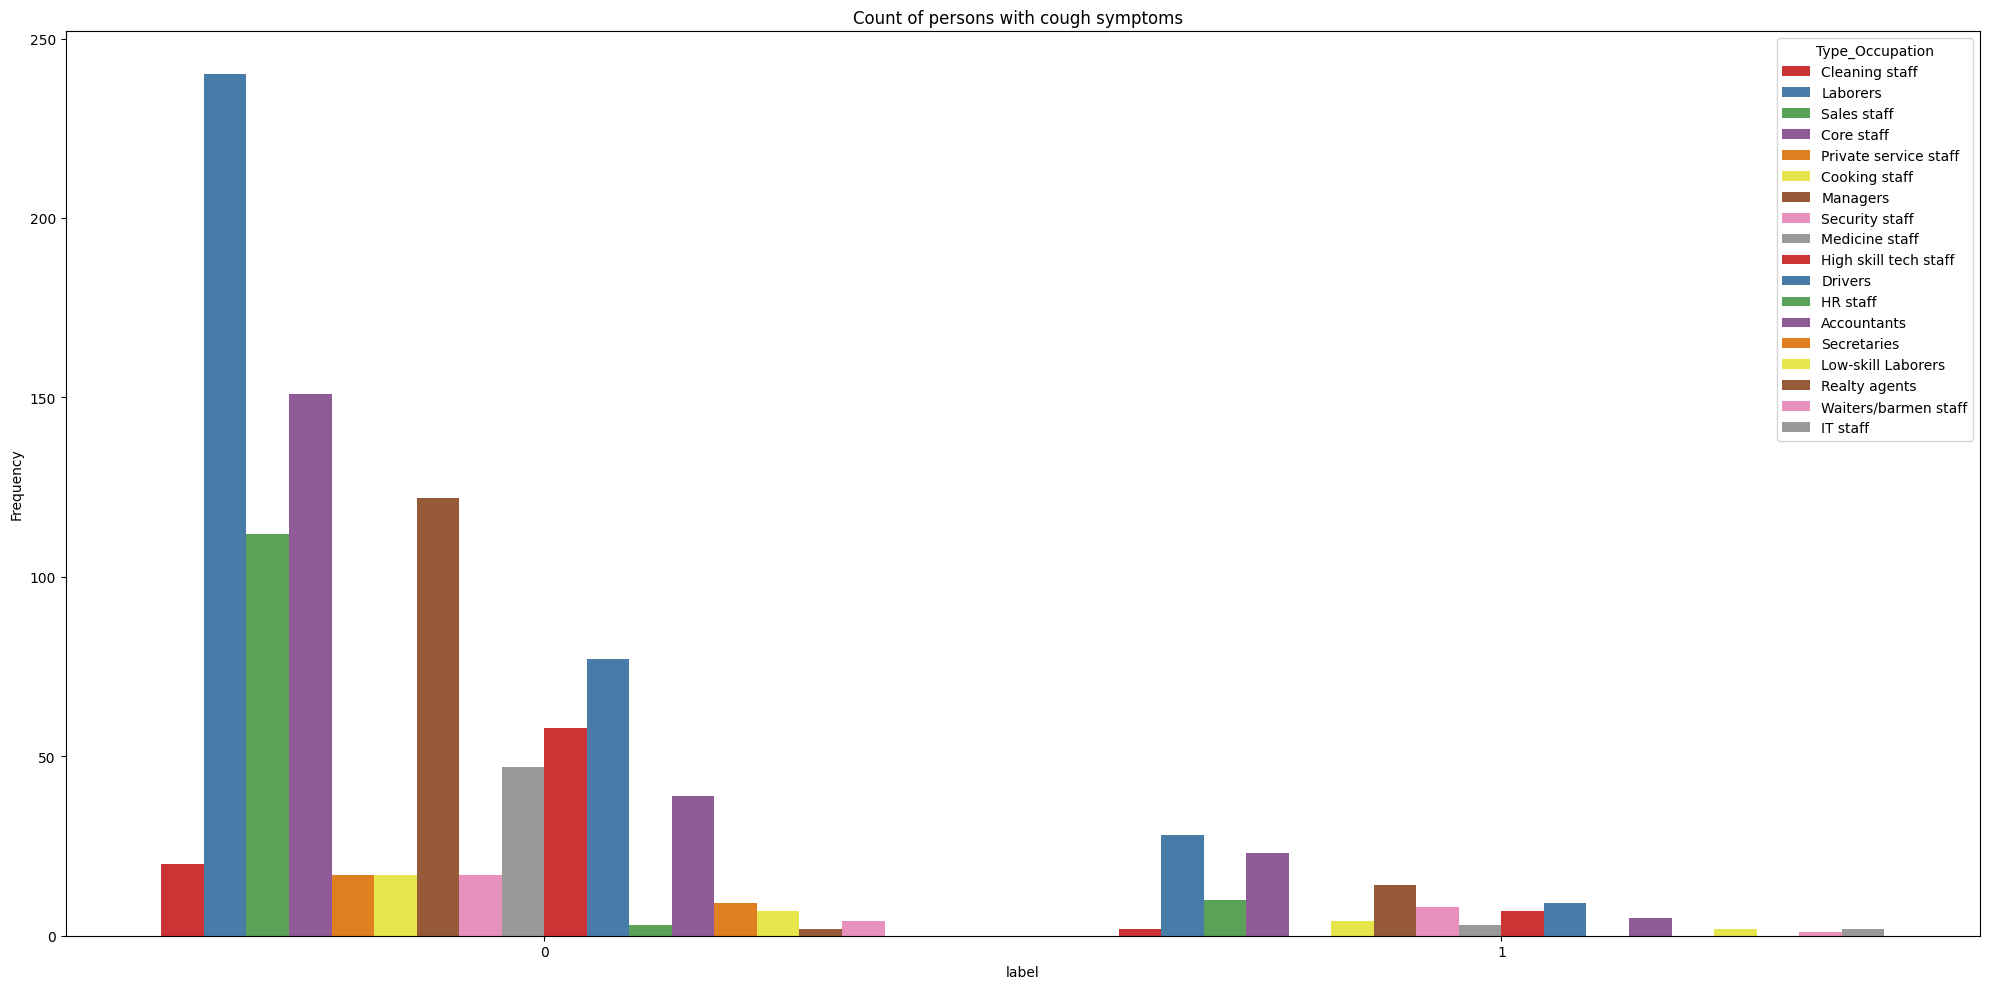

In [70]:
plt.figure(figsize=(20, 10))  # Adjust the figure size
# email_id_palette = sns.color_palette("Set2", len(cc_data['EMAIL_ID'].unique()))
# email_id_palette = sns.color_palette("Set2", len(cc_data['EMAIL_ID'].unique()))
sns.countplot(x=cc_data['label'], hue=cc_data["Type_Occupation"], palette='Set1')
plt.xlabel("label")
plt.ylabel("Frequency")
plt.title("Count of persons with cough symptoms  ")
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

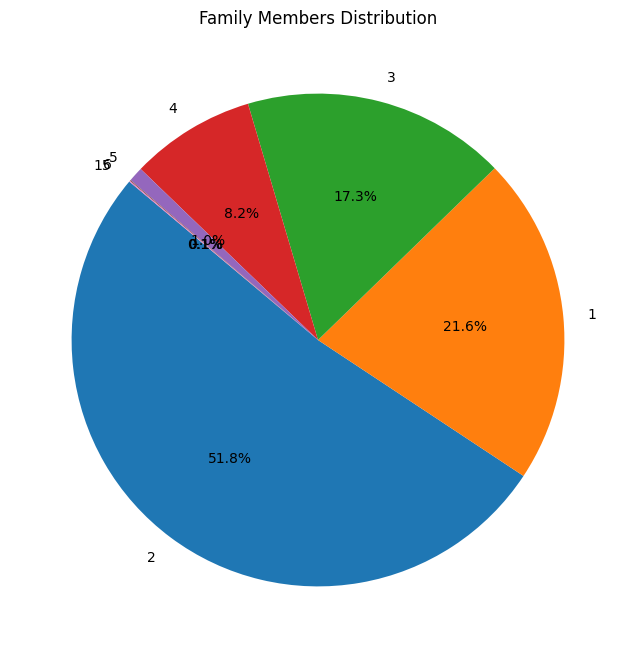

In [71]:
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
# plt.pie(family_members_counts.values(), labels=family_members_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.pie(cc_data["Family_Members"].value_counts(), labels=cc_data["Family_Members"].value_counts().index, autopct='%1.1f%%',startangle=140)
plt.title('Family Members Distribution')
plt.show()

From above pie chart , 51 % professional have 2 family memeber, as most of the professional are married , it is high possibility that these 51 % are couple.

In [72]:
cc_data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
Age                 22
Work_Experience      0
dtype: int64

Text(0.5, 1.0, 'Count of persons with cough symptoms  ')

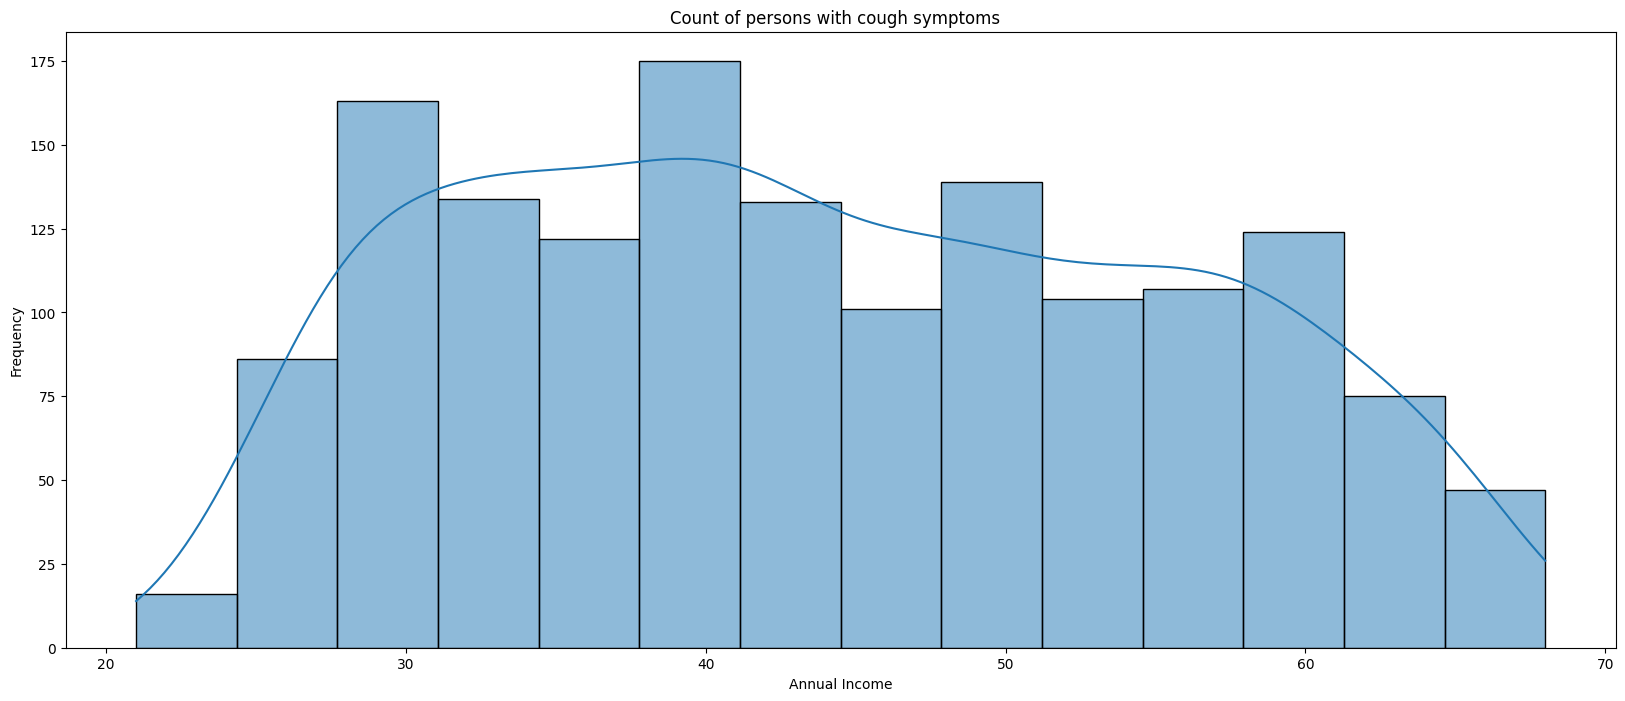

In [73]:
plt.figure(figsize=(20, 8), num=1)  # Adjust the figure size

sns.histplot(cc_data['Age'], kde=True)
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Count of persons with cough symptoms  ")

Distribution of Age is not regular z-distribution or normal distribution.It  look like bell shaped cruve but not have exact shape.

## Imputation Technique

Mean Age :  43.952817824377455
Median Age :  43.0


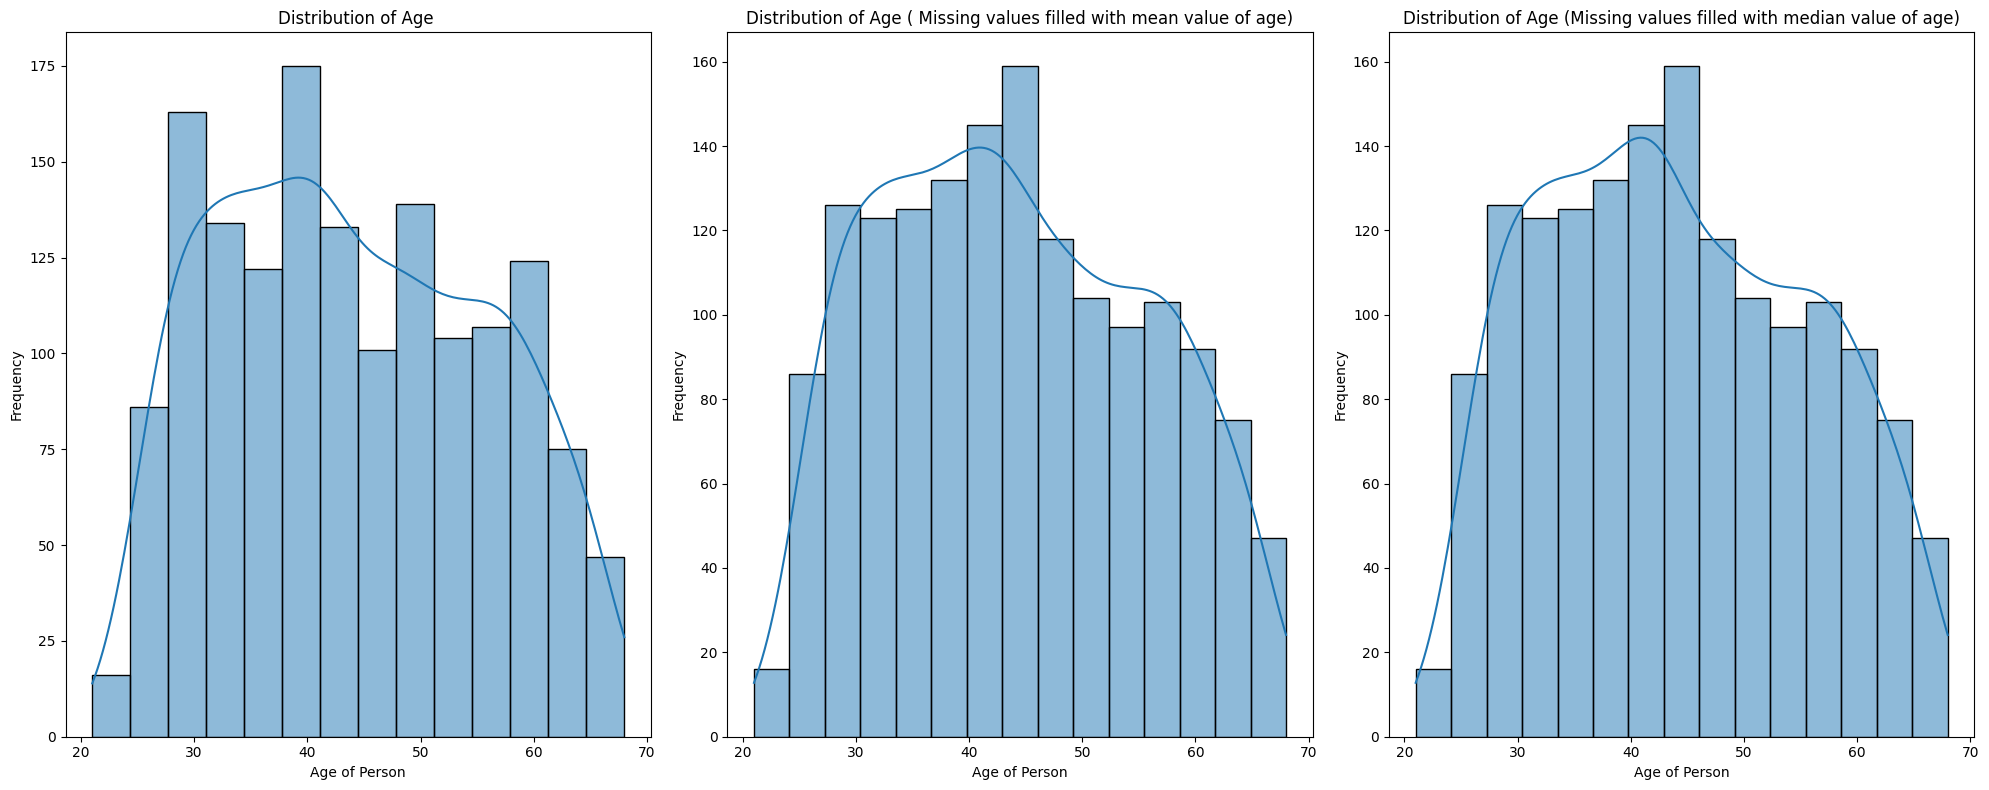

In [74]:
print("Mean Age : ",cc_data["Age"].mean())
print("Median Age : ",cc_data["Age"].median())
# Creating an empty DataFrame to fill the value with mean value of age
cc_data_mean_age = pd.DataFrame()

# Filling the empty DataFrame with values from a specific column of another dataset
cc_data_mean_age['Age'] = cc_data['Age']
cc_data_mean_age["Age"]=cc_data_mean_age["Age"].fillna(round(cc_data["Age"].mean()))

cc_data_median_age = pd.DataFrame()
# Filling the empty DataFrame with values from a specific column of another dataset
cc_data_median_age['Age'] = cc_data['Age']
cc_data_median_age["Age"]=cc_data_median_age["Age"].fillna(cc_data["Age"].median())

plt.figure(figsize=(20, 8))  # Adjust the figure size
plt.subplot(1, 3, 1)
sns.histplot(x=cc_data["Age"], kde=True)
plt.xlabel("Age of Person")
plt.ylabel("Frequency")
plt.title("Distribution of Age ")

plt.subplot(1, 3, 2)
sns.histplot(x=cc_data_mean_age["Age"], kde=True)
plt.xlabel("Age of Person")
plt.ylabel("Frequency")
plt.title("Distribution of Age ( Missing values filled with mean value of age)")


plt.subplot(1, 3, 3)
sns.histplot(x=cc_data_median_age["Age"], kde=True)
plt.xlabel("Age of Person")
plt.ylabel("Frequency")
plt.title("Distribution of Age (Missing values filled with median value of age)")

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

3 distribution of Age is plotted, one is with normal data,  2nd graph  shows the distribution of age with, when missing values are filled with mean value of age and 3rd graph shows the distribution of age with, when missing values are filled with median value of age.

On observing all 3 graphs it seems they have same distribution , as mean value of age and median value of age have small difference.

So filling the missing values with mean value of age.

In [75]:
cc_data["Age"]=cc_data["Age"].fillna(round(cc_data["Age"].mean()))



Mean Annual_income :  191399.3262295082
Median Annual_income :  166500.0


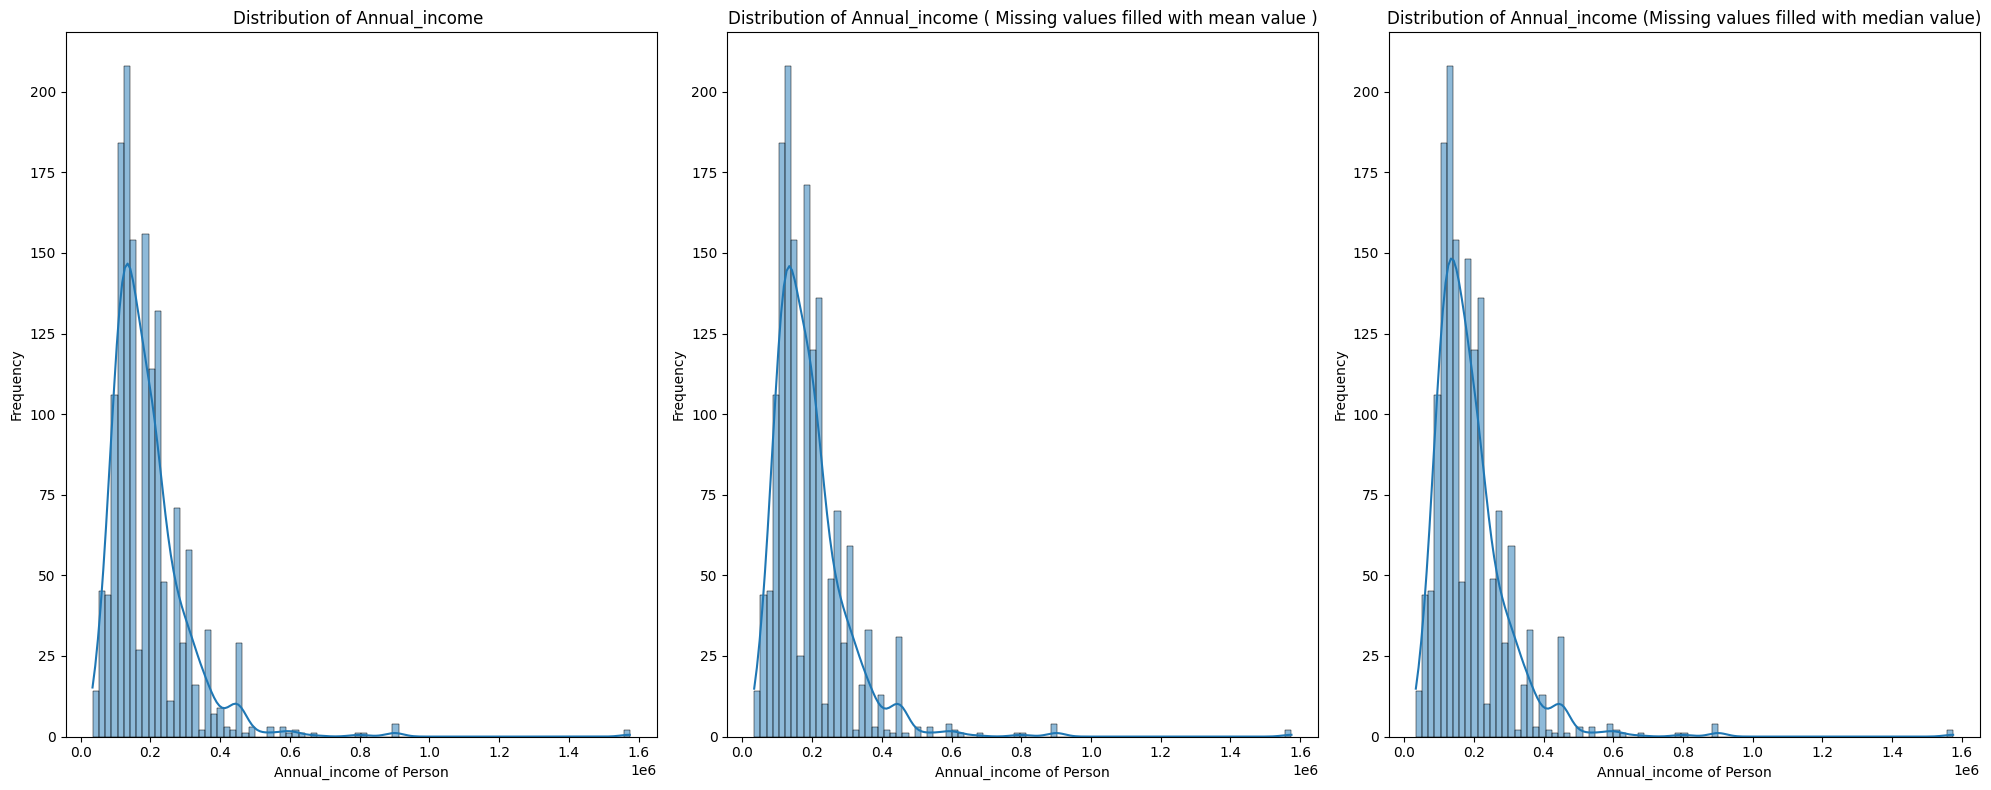

In [76]:
print("Mean Annual_income : ",cc_data["Annual_income"].mean())
print("Median Annual_income : ",cc_data["Annual_income"].median())
# Creating an empty DataFrame to fill the value with mean value of age
cc_data_mean_Annual_income = pd.DataFrame()

# Filling the empty DataFrame with values from a specific column of another dataset
cc_data_mean_Annual_income['Annual_income'] = cc_data['Annual_income']
cc_data_mean_Annual_income["Annual_income"]=cc_data_mean_Annual_income["Annual_income"].fillna(round(cc_data["Annual_income"].mean()))

cc_data_median_Annual_income = pd.DataFrame()
# Filling the empty DataFrame with values from a specific column of another dataset
cc_data_median_Annual_income['Annual_income'] = cc_data['Annual_income']
cc_data_median_Annual_income["Annual_income"]=cc_data_median_Annual_income["Annual_income"].fillna(cc_data["Annual_income"].median())

plt.figure(figsize=(20, 8))  # Adjust the figure size
plt.subplot(1, 3, 1)
sns.histplot(x=cc_data["Annual_income"], kde=True)
plt.xlabel("Annual_income of Person")
plt.ylabel("Frequency")
plt.title("Distribution of Annual_income ")

plt.subplot(1, 3, 2)
sns.histplot(x=cc_data_mean_Annual_income["Annual_income"], kde=True)
plt.xlabel("Annual_income of Person")
plt.ylabel("Frequency")
plt.title("Distribution of Annual_income ( Missing values filled with mean value )")


plt.subplot(1, 3, 3)
sns.histplot(x=cc_data_median_Annual_income["Annual_income"], kde=True)
plt.xlabel("Annual_income of Person")
plt.ylabel("Frequency")
plt.title("Distribution of Annual_income (Missing values filled with median value)")

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

3 distribution of Annual_income is plotted, one is with normal data,  2nd graph  shows the distribution of Annual_income with, when missing values are filled with mean value of Annual_income and 3rd graph shows the distribution of Annual_income with, when missing values are filled with median value of Annual_income.

On observing all 3 graphs it seems they have same distribution , as mean value of age and median value of age have small difference.

So filling the missing values with mean value of Annual_income.

In [77]:
cc_data["Annual_income"]=cc_data["Annual_income"].fillna(round(cc_data["Annual_income"].mean()))

In [78]:
# Separate the annual income based on label
from scipy import stats

rejected_income = cc_data[cc_data['label'] == 0]['Annual_income']
approved_income = cc_data[cc_data['label'] == 1]['Annual_income']
print(rejected_income)
print(approved_income)






175      81000.0
176     225000.0
177     180000.0
178     135000.0
179     135000.0
          ...   
1543    191399.0
1544    225000.0
1545    180000.0
1546    270000.0
1547    225000.0
Name: Annual_income, Length: 1373, dtype: float64
0      180000.0
1      315000.0
2      315000.0
3      191399.0
4      315000.0
         ...   
170    450000.0
171    450000.0
172    315000.0
173    157500.0
174    157500.0
Name: Annual_income, Length: 175, dtype: float64


## Testing of Hypothesis

Hypothesis 1 :annual income  of person  is related to credit card approval label.

As 'Annual_income' is numericl column and 'label' is categorical column. sO we are going to use t-test to check their is relationship between them or not.

In [79]:
#Hypothesis 1 :annual income  of person  is related to credit card approval label.

t_statistic, p_value = stats.ttest_ind(rejected_income, approved_income)
print("T-statistic:", t_statistic)
print("P-value:", p_value)



T-statistic: -1.0570694600112196
P-value: 0.2906450324916674


**P-value is greater than alpha(0.05), it means that annual income is very related to label column.**

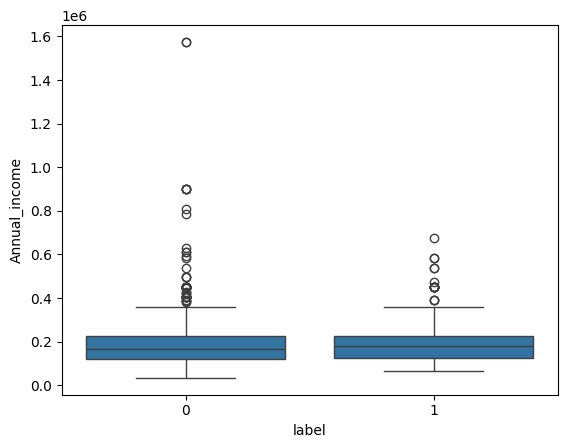

In [80]:
import seaborn as sns
sns.boxplot(x='label', y='Annual_income', data=cc_data)
plt.show()

Text(0.5, 1.0, 'Relationship between Age and Annual_income ')

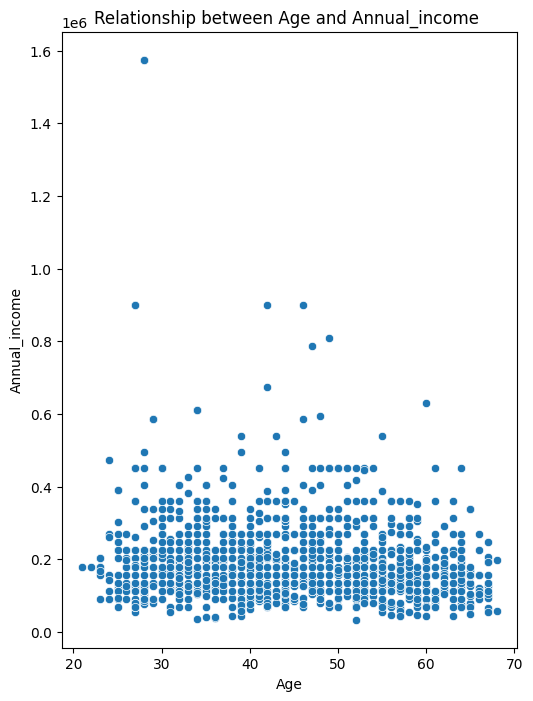

In [81]:
plt.figure(figsize=(20, 8))  # Adjust the figure size
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age',y='Annual_income',data=cc_data)
# plt.xlabel("Health Insurance Price for Person/Family")
# plt.ylabel("Frequency")
plt.title("Relationship between Age and Annual_income ")

In above scatter plot ,most of the person between 20 year to 70 year have income betweeon 2 lacs to 4 lacs.

In [82]:
pearson_corr = cc_data['Age'].corr(cc_data['Annual_income'])
print("Pearson correlation coefficient:", pearson_corr)

Pearson correlation coefficient: -0.1097671132918864


**correlation coefficient of between Age and Annual_income is slightly neagtive means their is slightly neagtive linear relationship between these two columns.**

In [83]:
cc_data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
Age                  0
Work_Experience      0
dtype: int64

In [84]:
cc_data["GENDER"].mode()[0]

'F'

In [85]:
cc_data['GENDER'].fillna(cc_data["GENDER"].mode()[0], inplace=True) # to impute the missing values wuth this technique.

In [86]:
from scipy.stats import chi2_contingency
# from scipy.stats import cramers_v

# Create a contingency table (cross-tabulation) of the two categorical variables
contingency_table = pd.crosstab(cc_data['Type_Occupation'], cc_data['label'])

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared test statistic:", chi2)
print("P-value:", p)



Chi-squared test statistic: 37.22547560916544
P-value: 0.0031362182876011747


In [87]:
cc_data['Type_Occupation'].fillna(cc_data["Type_Occupation"].mode()[0], inplace=True)

In [88]:
cc_data.isnull().sum()

Ind_ID              0
GENDER              0
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income       0
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count     22
Employed_days       0
Mobile_phone        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Type_Occupation     0
Family_Members      0
label               0
Age                 0
Work_Experience     0
dtype: int64

In [89]:
cc_dataset= cc_data.drop(['Birthday_count','Employed_days'], axis=1)  # This is final dataset which have cleaned data and would store in final csv file.
# Store the final dataset in a CSV file
cc_dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/final_credit_carddataset.csv', index=False)

In [ ]:
print(type(cc_dataset))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
cc_dataset.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
Age                0
Work_Experience    0
dtype: int64

In [ ]:
print(list(cc_dataset.columns))

['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members', 'label', 'Age', 'Work_Experience']


In [ ]:
cc_dataset.head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Work_Experience
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,1,51.0,0.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,44.0,1.6
3,5009749,F,Y,N,0,191399.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
5,5009753,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary,Married,House / apartment,1,0,0,0,Laborers,2,1,61.0,0.0
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary,Married,House / apartment,1,0,1,1,Core staff,3,1,50.0,1.9
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary,Married,House / apartment,1,0,1,1,Core staff,3,1,50.0,1.9


# Feature Engineering- Data Splitting, Feature Scaling and Feature Selection



In [ ]:
X=cc_dataset.drop(columns=["Ind_ID","Mobile_phone"],axis=1)
# X.head()
# y = covid_df["Corona"]
y = cc_dataset['label']

Divdided the above data into tow parts categorical features and numerical features to implement the feature scaling for numerical_feature and encoding for categorical column.

In [ ]:
#Feature Scaling for numerical columns.

from sklearn.preprocessing import MinMaxScaler
numerical_features = X[['Annual_income', 'Age','Work_Experience']]
categorical_features = X[['Marital_status',"GENDER","Car_Owner",'Propert_Owner','Type_Income','Type_Occupation','Family_Members','EDUCATION','Work_Phone','EMAIL_ID','Housing_type']]

# Perform Min-Max scaling on numerical features
scaler = MinMaxScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

In [ ]:
#Encoding(one Hot encoding and Ordinal Encoding) for categorical columns.
categorical_features=pd.get_dummies(categorical_features,columns=["Marital_status","GENDER","Car_Owner",'Propert_Owner','Type_Income','Type_Occupation','Housing_type','Family_Members'],drop_first=True)
mappings={

    "EDUCATION":{"Lower secondary":0,"Secondary":1,"Incomplete higher":2,"Higher education":3,"Academic degree":4}
}

for i in categorical_features: # reviews
  if i in mappings: # if reviews in mappings
    categorical_features[i]=categorical_features[i].map(mappings[i])

In [ ]:
#Combined the data after feature scaling and encoding
combined_features = pd.concat([scaled_numerical_df, categorical_features], axis=1)
combined_features.head()
# print(combined_features)
print(combined_features.isnull().sum())

Annual_income                            0
Age                                      0
Work_Experience                          0
EDUCATION                                0
Work_Phone                               0
EMAIL_ID                                 0
Marital_status_Married                   0
Marital_status_Separated                 0
Marital_status_Single / not married      0
Marital_status_Widow                     0
GENDER_M                                 0
Car_Owner_Y                              0
Propert_Owner_Y                          0
Type_Income_Pensioner                    0
Type_Income_State servant                0
Type_Income_Working                      0
Type_Occupation_Cleaning staff           0
Type_Occupation_Cooking staff            0
Type_Occupation_Core staff               0
Type_Occupation_Drivers                  0
Type_Occupation_HR staff                 0
Type_Occupation_High skill tech staff    0
Type_Occupation_IT staff                 0
Type_Occupa

0

In [ ]:
#Data Splitting
from sklearn.model_selection import train_test_split

# splitting the data between training set and testing data set.
X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.1, random_state=0)

In [ ]:
print(len(list(X_train.columns)))

44


#**Section 4: Machine learning approach**


## feature Selection and Model Training


We are using Recursive Feature Elimination Technique , with this we have use 'RandomForestClaossifier' as estimator.

Here we are using 4 algorithm based model :

1. Logistic Regression
2. Gradient Boosting
3. Random Forest
4. Support Vector machine

For each model we have calulated the accuracy ,confusion metrix and precision call curve which give auc value of each model.


In [ ]:
X_train.head()
print(list(X_train.columns))

['Annual_income', 'Age', 'Work_Experience', 'EDUCATION', 'Work_Phone', 'EMAIL_ID', 'Marital_status_Married', 'Marital_status_Separated', 'Marital_status_Single / not married', 'Marital_status_Widow', 'GENDER_M', 'Car_Owner_Y', 'Propert_Owner_Y', 'Type_Income_Pensioner', 'Type_Income_State servant', 'Type_Income_Working', 'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff', 'Type_Occupation_Core staff', 'Type_Occupation_Drivers', 'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff', 'Type_Occupation_IT staff', 'Type_Occupation_Laborers', 'Type_Occupation_Low-skill Laborers', 'Type_Occupation_Managers', 'Type_Occupation_Medicine staff', 'Type_Occupation_Private service staff', 'Type_Occupation_Realty agents', 'Type_Occupation_Sales staff', 'Type_Occupation_Secretaries', 'Type_Occupation_Security staff', 'Type_Occupation_Waiters/barmen staff', 'Housing_type_House / apartment', 'Housing_type_Municipal apartment', 'Housing_type_Office apartment', 'Housing_type_R

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
num_features_to_select = 44 # Set the number of features to select
model_for_rfe = HistGradientBoostingClassifier()
# columns_to_exclude = ['Test_date']
# features_to_select = [col for col in X_train.columns if col not in columns_to_exclude]
# print(len(features_to_select))

rfe = RFE( estimator = model_for_rfe, n_features_to_select=num_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Annual_income', 'Age', 'Work_Experience', 'EDUCATION', 'Work_Phone',
       'EMAIL_ID', 'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow',
       'GENDER_M', 'Car_Owner_Y', 'Propert_Owner_Y', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff',
       'Type_Occupation_Core staff', 'Type_Occupation_Drivers',
       'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff',
       'Type_Occupation_IT staff', 'Type_Occupation_Laborers',
       'Type_Occupation_Low-skill Laborers', 'Type_Occupation_Managers',
       'Type_Occupation_Medicine staff',
       'Type_Occupation_Private service staff',
       'Type_Occupation_Realty agents', 'Type_Occupation_Sales staff',
       'Type_Occupation_Secretaries', 'Type_Occupation_Security staff',
       'Type_Occupation_Waiters/barmen sta

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# 1.Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_rfe, y_train)
logistic_regression_model.feature_names_in_ = selected_features
y_pred_logistic = logistic_regression_model.predict(X_test[selected_features])
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)

# 2. Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_rfe, y_train)
gradient_boosting_model.feature_names_in_ = selected_features
y_pred_gb = gradient_boosting_model.predict(X_test[selected_features])
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)

# 3. RandomForest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_rfe, y_train)
y_pred_rf = random_forest_model.predict(X_test[selected_features])
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# 4. Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_rfe, y_train)
y_pred_svm = svm_model.predict(X_test[selected_features])
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

Accuracy (Logistic Regression): 0.8709677419354839
Accuracy (Gradient Boosting): 0.864516129032258
Accuracy (Random Forest): 0.9290322580645162
Accuracy (SVM): 0.8709677419354839


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


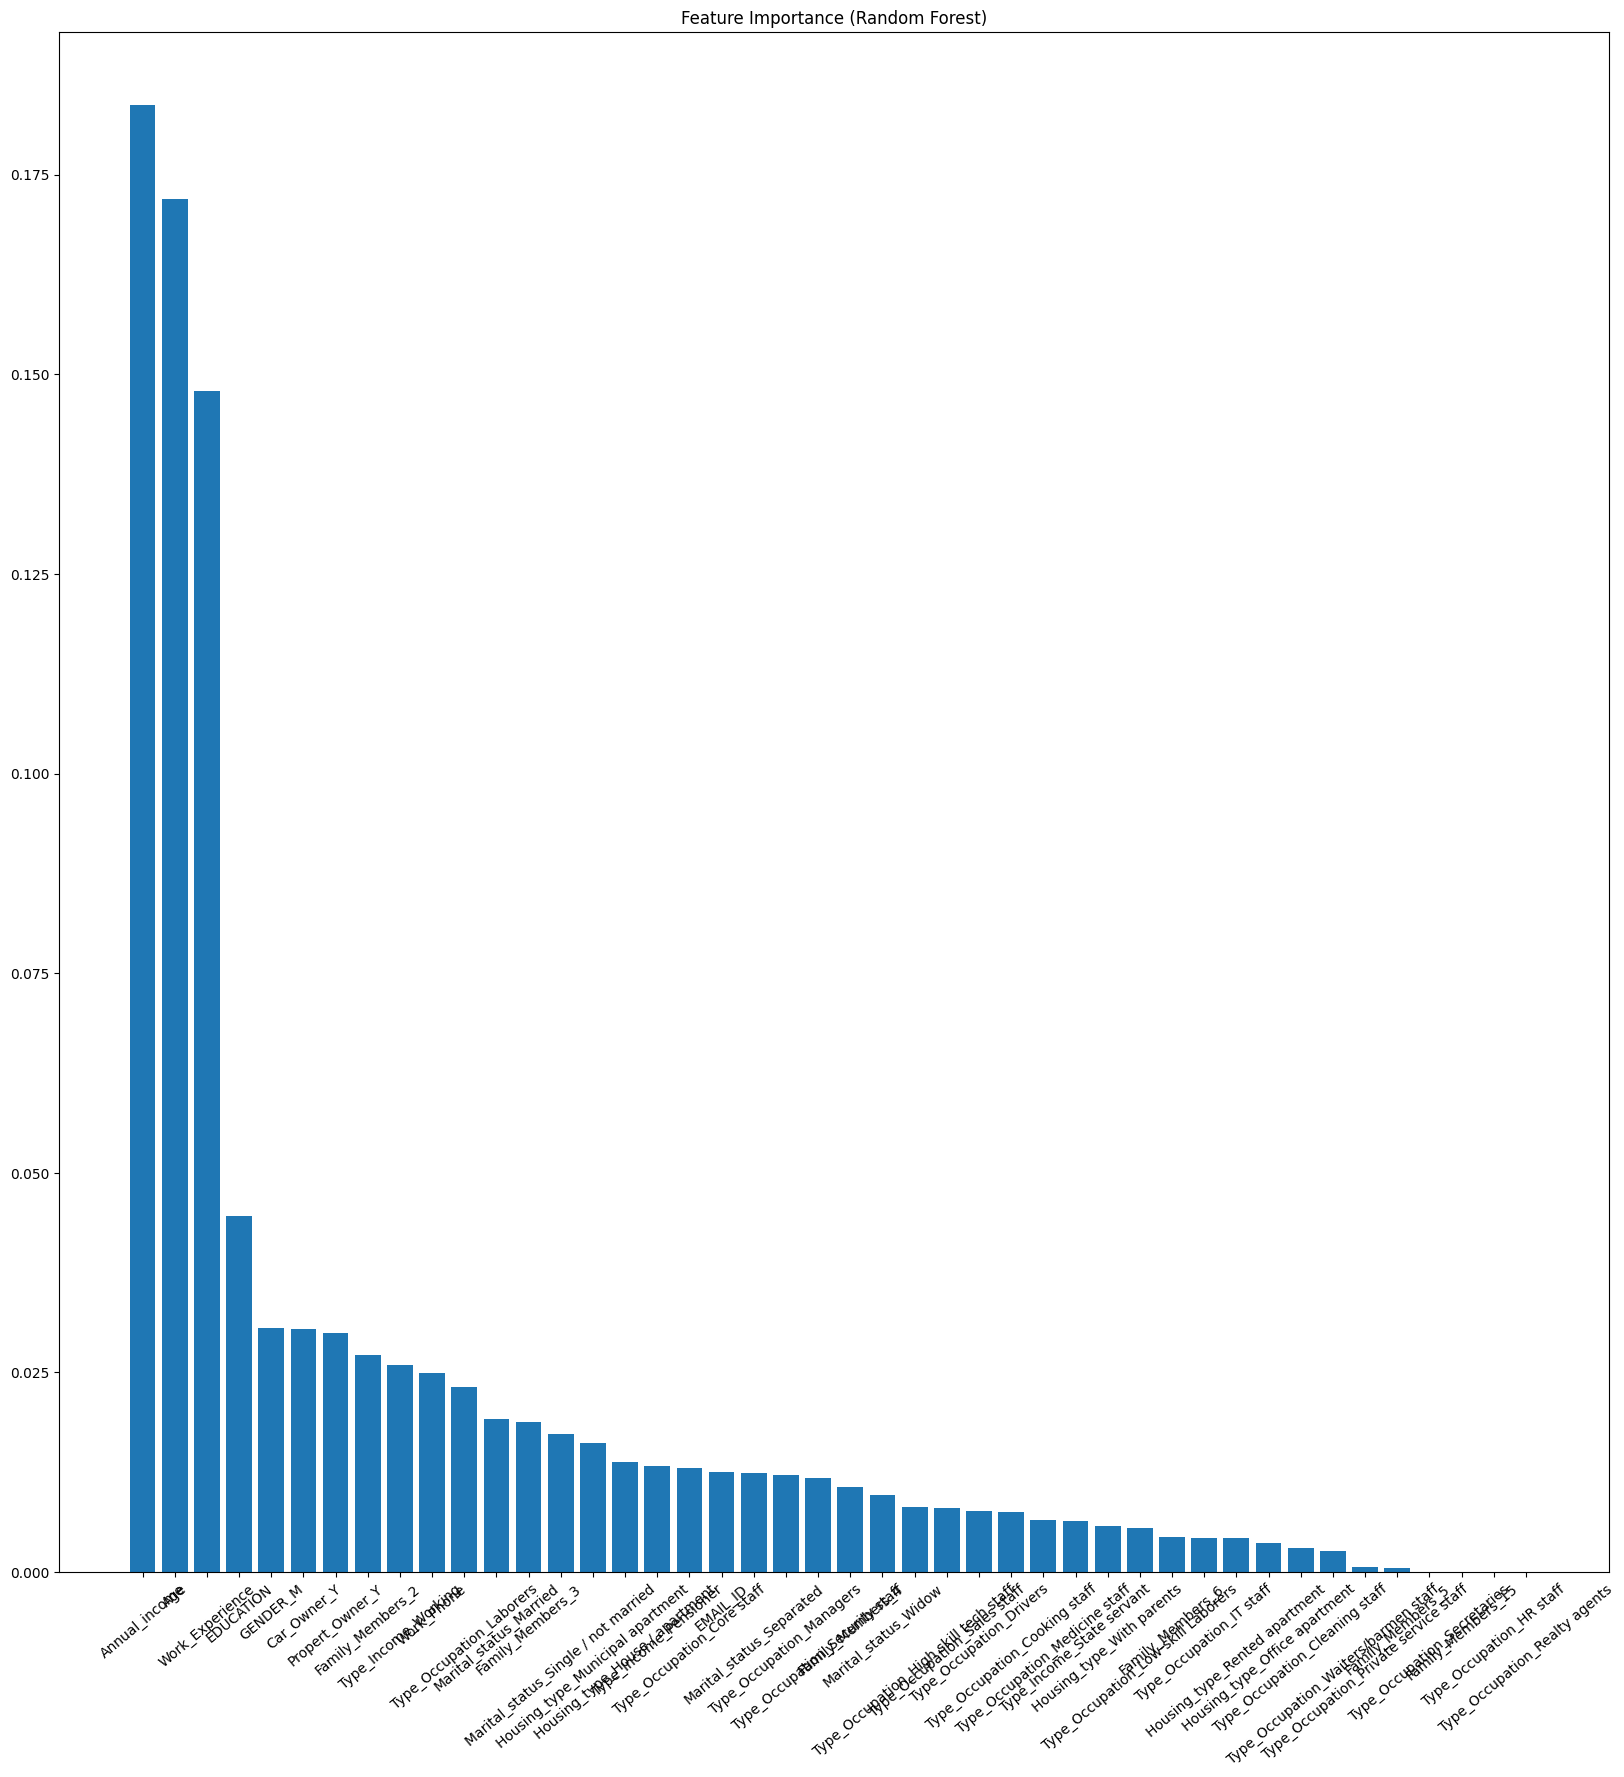

In [ ]:
import matplotlib.pyplot as plt
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20, 20))
plt.bar(range(X_train_rfe.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_rfe.shape[1]), selected_features[indices], rotation=40)
plt.title("Feature Importance (Random Forest)")
plt.show()

In above graph that we have plotted for feature importance graph  for Random Forest Algorithm in which  'Age' column has highest feature importance with 17% .


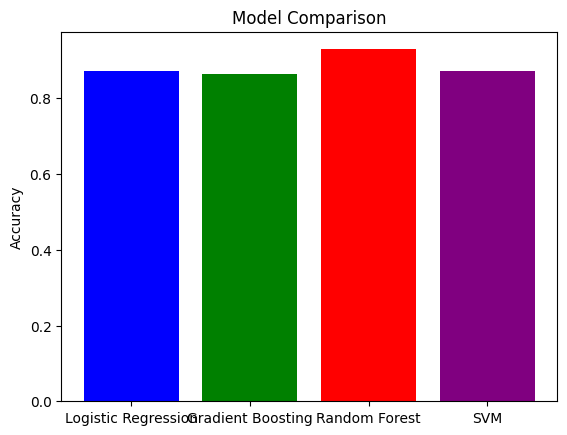

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
accuracies = [accuracy_logistic, accuracy_gb, accuracy_rf, accuracy_svm]

plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

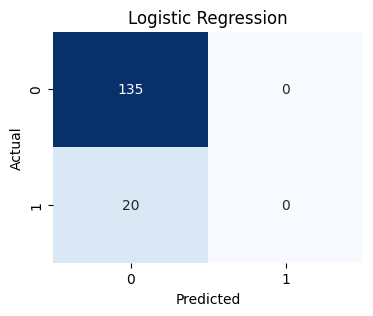

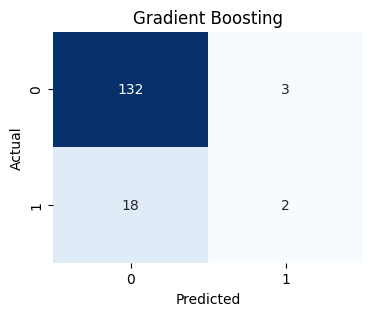

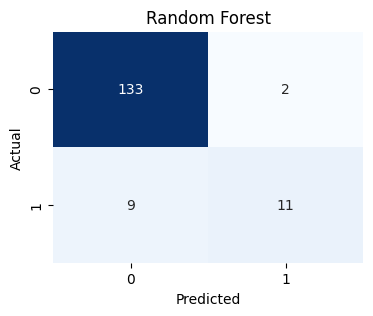

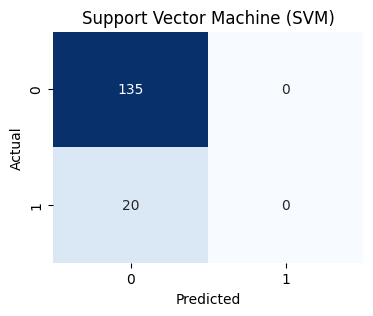

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_test, y_pred_logistic, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_gb, 'Gradient Boosting')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_confusion_matrix(y_test, y_pred_svm, 'Support Vector Machine (SVM)')

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Gradient Boosting': {'learning_rate': [0.01, 0.1, 1], 'n_estimators': [50]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
}

# Perform grid search with stratified k-fold cross-validation for each model
cv_results = {}
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grid=param_grids[name], cv=StratifiedKFold(n_splits=5), scoring='accuracy')
    grid_search.fit(X_train_rfe, y_train)
    cv_results[name] = grid_search.cv_results_
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluate best models on the test set
accuracy_scores = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test[selected_features])
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({name}):", accuracy_scores[name])


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'C': 1}
Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 1, 'n_estimators': 50}
Training Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Training SVM...
Best parameters for SVM: {'C': 1, 'gamma': 1}
Accuracy (Logistic Regression): 0.8709677419354839
Accuracy (Gradient Boosting): 0.8903225806451613
Accuracy (Random Forest): 0.9290322580645162
Accuracy (SVM): 0.9032258064516129


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


To improve the model accuracy we have used the some hyperparametr tuning values and stratified k sampling uising this the accuracy of
Gradient Boosting and SVM alogrithms has increased.

## SQL Question

In [90]:
import duckdb
import pandas as pd
cc_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_credit_carddataset.csv')
cc_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Work_Experience
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,1,51.0,0.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,44.0,1.6
3,5009749,F,Y,N,0,191399.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6


Q1. Group the customers based on their income type ans fid the average of their annual income.
        

Q2. Find the female owners of cars and property

Q3. Find the male customers who are staying with their families.

Q4. Please list the top five people having the highest income.

Q5. How many married people are having bad credit?

Q6. What is the highest education level and what is the total count ?

Q7. Between married males and females , who is having more bad credit ?

Q1 :  Group the customers based on their income type ans fid the average of their annual income.

In [92]:
conn=duckdb.connect()
conn.register('cc_data',cc_df)
q1_query = """
SELECT Type_Income, AVG(Annual_income) AS Average_Income
FROM cc_dataset
GROUP BY Type_Income;
"""
# conn.execute("select count(Ind_ID) as number_of_corona_patients  from covid_19_data where Shortness_of_breath='False'  ").fetchdf().head()
print(conn.execute(q1_query).fetchdf())

            Type_Income  Average_Income
0             Pensioner   155713.741636
1               Working   181191.429825
2         State servant   211422.413793
3  Commercial associate   233653.128767


Q2. Find the female owners of cars and property

In [94]:
#Q2. Find the female owners of cars and property

q2_query = """
SELECT *
FROM cc_dataset
WHERE GENDER = 'F' AND (Car_Owner = 'Y' OR Propert_Owner = 'Y');
"""
# conn.execute("select count(Ind_ID) as number_of_corona_patients  from covid_19_data where Shortness_of_breath='False'  ").fetchdf().head()
conn.execute(q2_query).fetchdf().head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Work_Experience
0,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
1,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,44.0,1.6
2,5009749,F,Y,N,0,191399.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
3,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
4,5009753,F,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
5,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1.6
6,5018498,F,Y,Y,0,90000.0,Working,Secondary,Married,House / apartment,1,1,1,0,Cooking staff,2,1,52.0,2.7
7,5018501,F,Y,Y,0,191399.0,Working,Secondary,Married,House / apartment,1,1,1,0,Cooking staff,2,1,52.0,2.7
8,5018503,F,Y,Y,0,90000.0,Working,Secondary,Married,House / apartment,1,1,1,0,Cooking staff,2,1,52.0,2.7
9,5024213,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Laborers,2,1,43.0,0.5


Q3. Find the male customers who are staying with their families.

In [96]:
#Q3. Find the male customers who are staying with their families.
q3_query = """
SELECT *
FROM cc_dataset
WHERE GENDER = 'M' AND Family_Members > 1;
"""
# conn.execute("select count(Ind_ID) as number_of_corona_patients  from covid_19_data where Shortness_of_breath='False'  ").fetchdf().head()
conn.execute(q3_query).fetchdf().head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Work_Experience
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,1,51.0,0.0
1,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary,Married,House / apartment,1,0,1,1,Core staff,3,1,50.0,1.9
2,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary,Married,House / apartment,1,0,1,1,Core staff,3,1,50.0,1.9
3,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,1,0,0,1,Laborers,3,1,24.0,2.5
4,5021310,M,N,Y,0,270000.0,Working,Secondary,Married,House / apartment,1,0,0,0,Laborers,2,1,46.0,0.7
5,5021314,M,N,Y,0,270000.0,Working,Secondary,Single / not married,House / apartment,1,0,0,0,Laborers,2,1,46.0,0.7
6,5021998,M,N,Y,0,90000.0,Pensioner,Secondary,Married,House / apartment,1,0,0,1,Laborers,2,1,52.0,4.5
7,5022617,M,Y,Y,0,202500.0,Commercial associate,Secondary,Civil marriage,House / apartment,1,0,0,1,Laborers,2,1,33.0,4.6
8,5023781,M,N,Y,0,157500.0,Commercial associate,Higher education,Civil marriage,House / apartment,1,0,0,0,Accountants,2,1,49.0,3.0
9,5028580,M,N,N,0,540000.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,1,55.0,1.9


Q4. Please list the top five people having the highest income.

In [97]:
#Q4. Please list the top five people having the highest income.

q4_query = """
SELECT *
FROM cc_dataset
ORDER BY Annual_income DESC
LIMIT 5;
"""
# conn.execute("select count(Ind_ID) as number_of_corona_patients  from covid_19_data where Shortness_of_breath='False'  ").fetchdf().head()
conn.execute(q4_query).fetchdf().head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Work_Experience
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,0,Managers,2,0,28.0,6.8
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,0,Managers,2,0,28.0,6.8
2,5090470,M,N,Y,1,900000.0,Working,Secondary,Married,House / apartment,1,0,0,0,Laborers,3,0,42.0,12.4
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,4,0,27.0,2.7
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,4,0,27.0,2.7


Q5. How many married people are having bad credit?

In [101]:
#Q5. How many married people are having bad credit?
q5_query = """
SELECT count(*) as Married_people_bad_credit
FROM cc_dataset
where Marital_status='Married' and label=0 group by label ;
"""
# conn.execute("select count(Ind_ID) as number_of_corona_patients  from covid_19_data where Shortness_of_breath='False'  ").fetchdf().head()
conn.execute(q5_query).fetchdf().head(10)

,Married_people_bad_credit
0,935


Q6. What is the highest education level and what is the total count ?

In [103]:
#Q6. What is the highest education level and what is the total count ?
q6_query = """
SELECT COUNT(*) AS Total_Count
FROM cc_dataset
WHERE EDUCATION = 'Academic degree';
"""
# conn.execute("select count(Ind_ID) as number_of_corona_patients  from covid_19_data where Shortness_of_breath='False'  ").fetchdf().head()
conn.execute(q6_query).fetchdf().head(10)

,Total_Count
0,2


Q7.  Between married males and females , who is having more bad credit ?

In [106]:
# Q7 . Between married males and females , who is having more bad credit ?
q7_query = """
SELECT count(*) as Married_people, GENDER
FROM cc_dataset
where Marital_status='Married'  group by GENDER ;
"""
conn.execute(q7_query).fetchdf().head(10)

,Married_people,GENDER
0,419,M
1,630,F
